In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [2]:

spark = SparkSession.builder.appName("YelpDataAnalysis").getOrCreate()

24/11/19 21:04:56 WARN Utils: Your hostname, yelp resolves to a loopback address: 127.0.1.1; using 10.210.173.189 instead (on interface ens18)
24/11/19 21:04:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/19 21:04:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
business_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_business.json")
business_df.show(5)

24/11/19 21:05:13 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|{8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

In [4]:
arizona_business_df = business_df.filter(business_df['state'] == 'AZ')
arizona_business_df.show(5)

+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|  city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|5255 E Broadway Blvd|{null, null, null...|tUFrWirKiKi_TAnsV...|Department Stores...|Tucson|{8:0-23:0, 8:0-22...|      0| 32.223236| -110.880452|              Target|      85711|          22|  3.5|   AZ|
|     625 N Stone Ave|{null, null, null...|rBmpy_Y1UbBx8ggHl...|Automotive, Auto ...|Tucson|{8:0-17:0, 0:0-0:...|      1|32.2298719|-110.9723419|Arizona Truck Out...|      85705|      

In [5]:
checkin_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_checkin.json")
checkin_df.show(5)

+--------------------+--------------------+
|         business_id|                date|
+--------------------+--------------------+
|---kPU91CF4Lq2-Wl...|2020-03-13 21:10:...|
|--0iUa4sNDFiZFrAd...|2010-09-13 21:43:...|
|--30_8IhuyMHbSOcN...|2013-06-14 23:29:...|
|--7PUidqRWpRSpXeb...|2011-02-15 17:12:...|
|--7jw19RH9JKXgFoh...|2014-04-21 20:42:...|
+--------------------+--------------------+
only showing top 5 rows



In [6]:
review_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_review.json")
review_df.show(5)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

In [7]:
tip_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_tip.json")
tip_df.show(5)

+--------------------+----------------+-------------------+--------------------+--------------------+
|         business_id|compliment_count|               date|                text|             user_id|
+--------------------+----------------+-------------------+--------------------+--------------------+
|3uLgwr0qeCNMjKenH...|               0|2012-05-18 02:17:21|Avengers time wit...|AGNUgVwnZUey3gcPC...|
|QoezRbYQncpRqyrLH...|               0|2013-02-05 18:35:10|They have lots of...|NBN4MgHP9D3cw--Sn...|
|MYoRNLb5chwjQe3c_...|               0|2013-08-18 00:56:08|It's open even wh...|-copOvldyKh1qr-vz...|
|hV-bABTK-glh5wj31...|               0|2017-06-27 23:05:38|Very decent fried...|FjMQVZjSqY8syIO-5...|
|_uN0OudeJ3Zl_tf6n...|               0|2012-10-06 19:43:09|Appetizers.. plat...|ld0AperBXk1h6Ubqm...|
+--------------------+----------------+-------------------+--------------------+--------------------+
only showing top 5 rows



In [8]:
user_df = spark.read.json("file:///home/dps/Documents/yelp_dataset/yelp_academic_dataset_user.json")
user_df.show(5)

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny|  name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|         3.91|    

In [9]:
arizona_business_df.createOrReplaceTempView("business")
checkin_df.createOrReplaceTempView("checkin")
tip_df.createOrReplaceTempView("tip")
review_df.createOrReplaceTempView("review")

### Query 1: Analyze the Most Popular Businesses by Review Count

In [10]:
query1 = spark.sql("""
SELECT 
    name AS business_name, 
    city, 
    review_count 
FROM 
    business 
ORDER BY 
    review_count DESC 
LIMIT 10;
""")

query1.show()

+--------------------+------+------------+
|       business_name|  city|review_count|
+--------------------+------+------------+
|       Prep & Pastry|Tucson|        2126|
|      El Charro Cafe|Tucson|        1583|
|      Cafe Poca Cosa|Tucson|        1306|
|    Culinary Dropout|Tucson|        1295|
|HUB Restaurant & ...|Tucson|        1270|
|          The Parish|Tucson|        1210|
|Guadalajara Origi...|Tucson|        1117|
|           Baja Cafe|Tucson|        1074|
|     Serial Grillers|Tucson|         986|
|   Wild Garlic Grill|Tucson|         968|
+--------------------+------+------------+



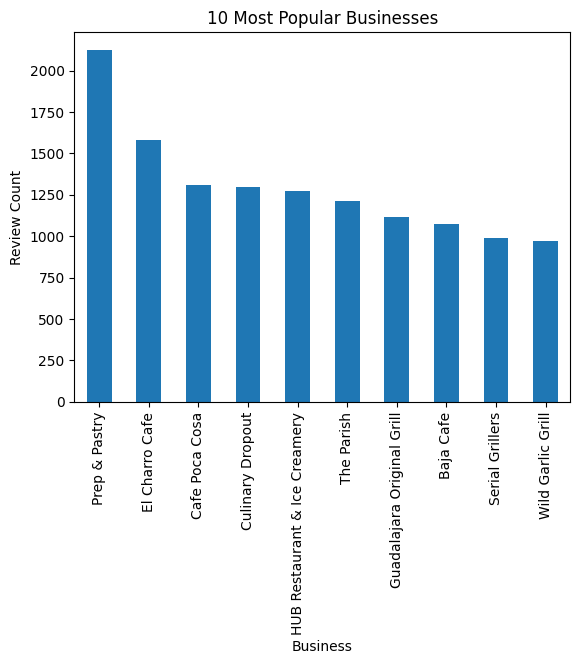

In [11]:
query1_df = query1.toPandas()
query1_df.plot(kind='bar', x='business_name', y='review_count', legend=False)
plt.title("10 Most Popular Businesses")
plt.xlabel("Business")
plt.ylabel("Review Count")
plt.show()

### Query 2: Find the Average Star Rating by City

In [12]:
query2 = spark.sql("""
 SELECT 
    city, 
    ROUND(AVG(stars), 2) AS average_rating 
FROM 
    business 
GROUP BY 
    city 
ORDER BY 
    average_rating DESC;
""")

query2.show()

+------------------+--------------+
|              city|average_rating|
+------------------+--------------+
|           Arizona|           5.0|
|Catalina Foothills|           5.0|
|     Picture Rocks|           5.0|
|  Corona de Tucson|           4.5|
|        Santa Rita|           4.5|
|    Drexel Heights|           4.5|
|   Tucson, Arizona|          4.25|
|            tucson|          4.13|
|             Tuson|           4.0|
|     Valencia West|           4.0|
|           Rillito|           4.0|
|           Tucson |          3.75|
|  Corona De Tucson|          3.75|
|          Catalina|          3.73|
|        Oro Valley|          3.69|
|              Vail|          3.67|
|            TUCSON|          3.67|
|           Cortaro|          3.67|
|      Mount Lemmon|          3.64|
|            Tucson|          3.59|
+------------------+--------------+
only showing top 20 rows



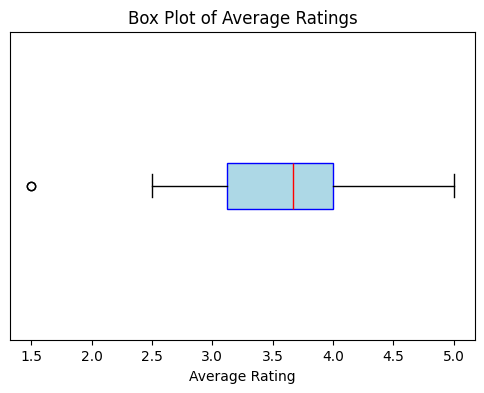

In [13]:
query2_df = query2.toPandas()
average_ratings = query2_df['average_rating']

plt.figure(figsize=(6, 4))
plt.boxplot(average_ratings, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

plt.title('Box Plot of Average Ratings')
plt.xlabel('Average Rating')
plt.yticks([]) 
plt.show()

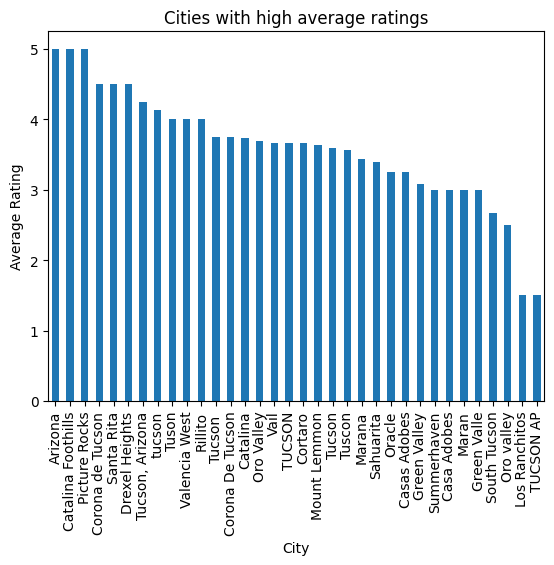

In [14]:
query2_df.plot(kind='bar', x='city', y='average_rating', legend=False)
plt.title("Cities with high average ratings")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.show()

### Query 3: Businesses with Most Complimented Tips

In [15]:
query3 = spark.sql("""
WITH ComplimentedTips AS (
    SELECT 
        business_id,
        SUM(compliment_count) AS total_compliments
    FROM 
        tip
    GROUP BY 
        business_id
)
SELECT 
    b.business_id,
    b.name,
    b.categories,
    b.city,
    ct.total_compliments
FROM 
    business b
JOIN 
    ComplimentedTips ct
ON 
    b.business_id = ct.business_id
ORDER BY 
    ct.total_compliments DESC
LIMIT 40
""")

query3.show(40)

+--------------------+--------------------+--------------------+--------+-----------------+
|         business_id|                name|          categories|    city|total_compliments|
+--------------------+--------------------+--------------------+--------+-----------------+
|6BZ1gasOkF1mNfmUx...|OM Modern Asian K...|Restaurants, Sush...|  Tucson|               10|
|muxda1cSVtplETqTf...|HUB Restaurant & ...|Ice Cream & Froze...|  Tucson|                9|
|dOOvB4HW-b0mWDpcv...|Reilly Craft Pizz...|Nightlife, Bars, ...|  Tucson|                8|
|4QMIJJWQOh7zpEwOX...|      Renee's Tucson|Italian, Restaura...|  Tucson|                8|
|3TNaIkVUKrHzeeWMo...|  Empire Pizza & Pub|Food, Pizza, Nigh...|  Tucson|                7|
|xdy61kO_r5p6Zw30d...|            Umi Star|Asian Fusion, Bar...|  Tucson|                7|
|nyQbp8DPZjIKOwV12...|The Abbey Eat + D...|Gastropubs, Ameri...|  Tucson|                6|
|KbSpEQ_54ovgNxOox...|         Time Market|Restaurants, Food...|  Tucson|       

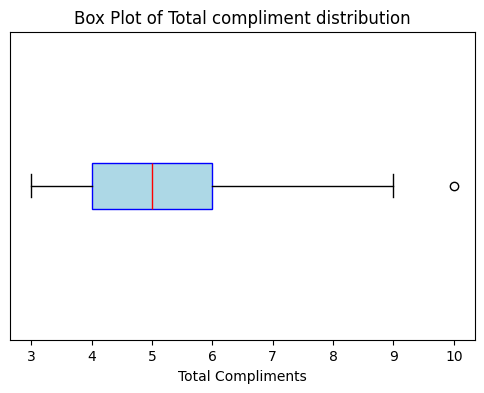

In [16]:
query3_df = query3.toPandas()
total_compliments = query3_df['total_compliments']

plt.figure(figsize=(6, 4))
plt.boxplot(total_compliments, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

plt.title('Box Plot of Total compliment distribution')
plt.xlabel('Total Compliments')
plt.yticks([])  
plt.show()

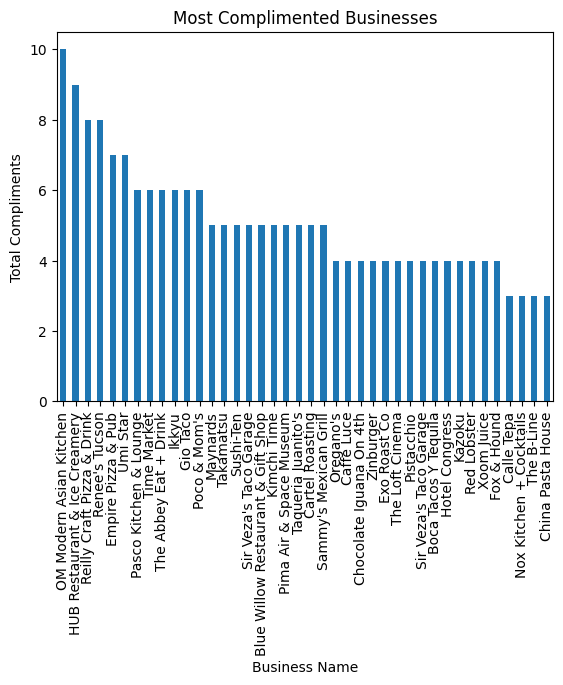

In [17]:
query3_df.plot(kind='bar', x='name', y='total_compliments', legend=False)
plt.title("Most Complimented Businesses")
plt.xlabel("Business Name")
plt.ylabel("Total Compliments")
plt.show()

### Query 4: Seasonal Trends in Business Reviews

In [18]:
query4 = spark.sql("""
WITH BusinessTotalReviews AS (
    SELECT 
        r.business_id,
        b.name,
        b.city,
        COUNT(*) AS total_reviews_all_months,
        ROUND(AVG(r.stars), 1) AS average_stars,
        RANK() OVER (ORDER BY COUNT(*) DESC) AS rank
    FROM 
        review r
    JOIN 
        business b
    ON 
        r.business_id = b.business_id
    GROUP BY 
        r.business_id, b.name, b.city
),
TopBusinesses AS (
    SELECT 
        business_id,
        name,
        city,
        average_stars,
        total_reviews_all_months,
        RANK() OVER (ORDER BY average_stars DESC) AS rank
    FROM 
        BusinessTotalReviews as b
    WHERE
        b.rank <= 10
),
SeasonalReviews AS (
    SELECT 
        r.business_id,
        b.name,
        b.city,
        EXTRACT(MONTH FROM r.date) AS review_month,
        COUNT(*) AS total_reviews
    FROM 
        review r
    JOIN 
        business b
    ON 
        r.business_id = b.business_id
    GROUP BY 
        r.business_id, b.name, b.city, EXTRACT(MONTH FROM r.date)
)

SELECT 
    sr.business_id,
    sr.name,
    sr.city,
    sr.review_month,
    sr.total_reviews,
    tb.average_stars
FROM 
    SeasonalReviews sr
JOIN 
    TopBusinesses tb
ON 
    sr.business_id = tb.business_id
WHERE 
    tb.rank <= 5 
    AND (sr.review_month BETWEEN 8 AND 12)
ORDER BY 
    tb.average_stars DESC, sr.name, sr.review_month ASC;
""")
query4.show(25)

24/11/19 21:06:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:06:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:06:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:06:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:06:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:06:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 2

+--------------------+---------------+------+------------+-------------+-------------+
|         business_id|           name|  city|review_month|total_reviews|average_stars|
+--------------------+---------------+------+------------+-------------+-------------+
|hyeo7JQr5uLp-St1M...|      Baja Cafe|Tucson|           8|           98|          4.6|
|hyeo7JQr5uLp-St1M...|      Baja Cafe|Tucson|           9|           76|          4.6|
|hyeo7JQr5uLp-St1M...|      Baja Cafe|Tucson|          10|           80|          4.6|
|hyeo7JQr5uLp-St1M...|      Baja Cafe|Tucson|          11|           86|          4.6|
|hyeo7JQr5uLp-St1M...|      Baja Cafe|Tucson|          12|           95|          4.6|
|UCMSWPqzXjd7QHq7v...|  Prep & Pastry|Tucson|           8|          190|          4.4|
|UCMSWPqzXjd7QHq7v...|  Prep & Pastry|Tucson|           9|          146|          4.4|
|UCMSWPqzXjd7QHq7v...|  Prep & Pastry|Tucson|          10|          195|          4.4|
|UCMSWPqzXjd7QHq7v...|  Prep & Pastry|Tucso

24/11/19 21:06:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:06:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:06:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:06:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:06:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:06:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 2

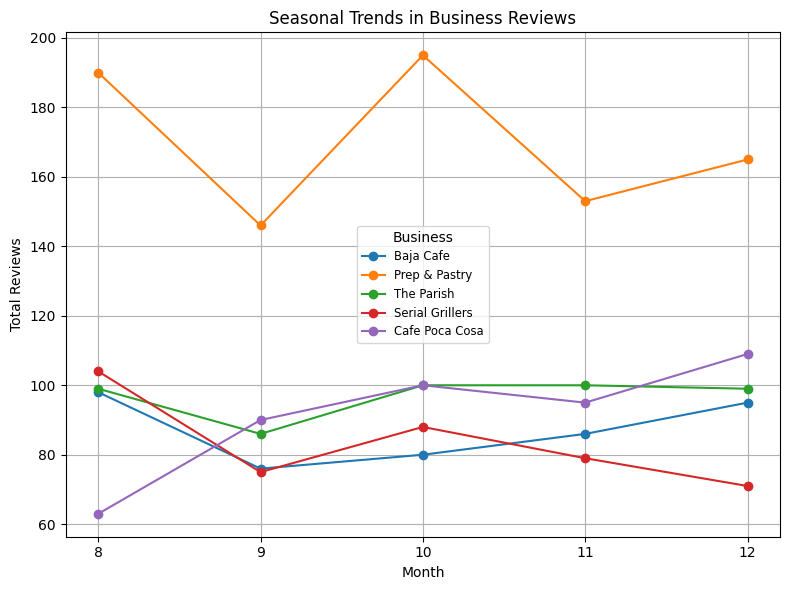

In [19]:
query4_df = query4.toPandas()

businesses = query4_df['name'].unique()
plt.figure(figsize=(8, 6))

for business in businesses:
    business_data = query4_df[query4_df['name'] == business]
    plt.plot(business_data['review_month'], business_data['total_reviews'], 
             marker='o', label=business)

plt.xlabel('Month')
plt.ylabel('Total Reviews')
plt.title('Seasonal Trends in Business Reviews')
plt.xticks(query4_df['review_month'].unique()) 
plt.legend(title='Business', loc='center', fontsize='small')
plt.grid(True)

plt.tight_layout()
plt.show()


### Query 5: Identifying Categories with High Customer Engagement

In [20]:
query5 = spark.sql("""
WITH BusinessTotalReviews AS (
    SELECT 
        r.business_id,
        b.name,
        b.city,
        COUNT(*) AS total_reviews,
        ROUND(AVG(r.stars), 1) AS average_stars,
        RANK() OVER (ORDER BY COUNT(*) DESC) AS rank
    FROM 
        review r
    JOIN 
        business b
    ON 
        r.business_id = b.business_id
    GROUP BY 
        r.business_id, b.name, b.city
),
BusinessTotalTips AS (
    SELECT 
        t.business_id,
        b.name,
        b.city,
        COUNT(*) AS total_tips
    FROM 
        tip t
    JOIN 
        business b
    ON 
        t.business_id = b.business_id
    GROUP BY 
        t.business_id, b.name, b.city
),
ReviewTips AS (
    SELECT
        bt.business_id,
        bt.name,
        bt.city,
        bt.total_tips,
        br.average_stars,
        br.total_reviews,
        RANK() OVER (ORDER BY total_tips DESC) AS rank
    FROM
        BusinessTotalTips AS bt
    JOIN
        BusinessTotalReviews AS br
    ON
        bt.business_id = br.business_id
    WHERE
        br.rank <= 40
),
EngagementMetric AS (
    SELECT
        rt.business_id,
        rt.name,
        rt.city,
        rt.total_tips,
        rt.average_stars,
        rt.total_reviews,
        RANK() OVER (ORDER BY average_stars DESC) AS rank
    FROM
        ReviewTips AS rt
    WHERE
        rt.rank <= 30
)

SELECT
    em.business_id,
    em.name,
    em.city,
    em.average_stars,
    em.total_tips,
    em.total_reviews
FROM
    EngagementMetric AS em
WHERE
    em.rank <= 20
ORDER BY 
    em.total_tips DESC
""")

query5.show()

24/11/19 21:07:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:07:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:07:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:07:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:07:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:07:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 2

+--------------------+--------------------+------+-------------+----------+-------------+
|         business_id|                name|  city|average_stars|total_tips|total_reviews|
+--------------------+--------------------+------+-------------+----------+-------------+
|UCMSWPqzXjd7QHq7v...|       Prep & Pastry|Tucson|          4.4|       323|         2230|
|WSx9-iYYyST_umny9...|          The Parish|Tucson|          4.4|       167|         1253|
|j8feOxyJqlIJWOi8s...|     Serial Grillers|Tucson|          4.3|       155|         1025|
|hyeo7JQr5uLp-St1M...|           Baja Cafe|Tucson|          4.6|       153|         1130|
|zwrgCMuZyFX46mL3p...|            Cup Cafe|Tucson|          4.2|       153|          899|
|14QP5lOdrTAVVCDDu...|Tucson Tamale Com...|Tucson|          4.2|       153|          828|
|IKMAgK2m6WRIViVFB...|         Miss Saigon|Tucson|          4.0|       147|          727|
|4QMIJJWQOh7zpEwOX...|      Renee's Tucson|Tucson|          4.4|       145|          680|
|8QJTzIaR5

24/11/19 21:07:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:07:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:07:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:07:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:07:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 21:07:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/19 2

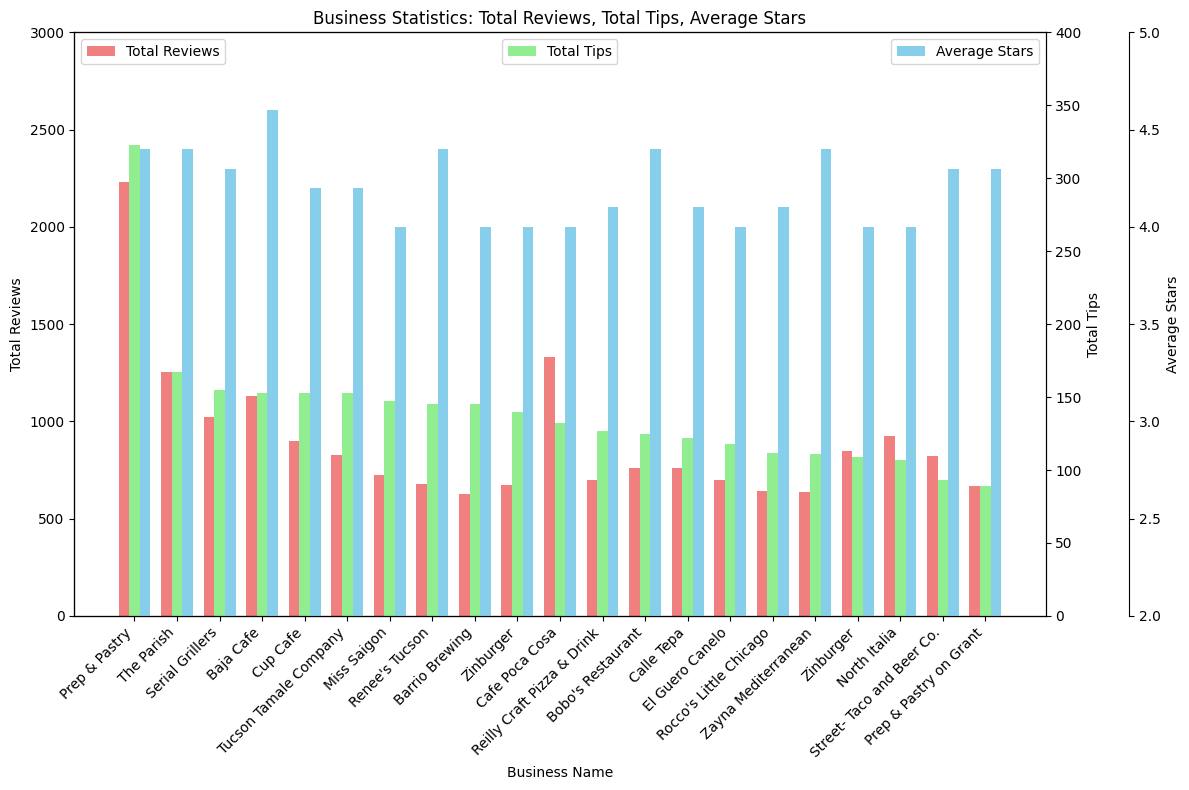

In [21]:
import numpy as np

query5_df = query5.toPandas()

businesses = query5_df['name']
average_stars = query5_df['average_stars']
total_tips = query5_df['total_tips']
total_reviews = query5_df['total_reviews']

bar_width = 0.25
index = np.arange(len(businesses))

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(index - bar_width, total_reviews, bar_width, label='Total Reviews', color='lightcoral')
ax1.set_xlabel('Business Name')
ax1.set_ylabel('Total Reviews')
ax1.set_xticks(index)
ax1.set_xticklabels(businesses, rotation=45, ha='right')
ax1.set_ylim(0, 3000)  

ax2 = ax1.twinx()
ax2.bar(index, total_tips, bar_width, label='Total Tips', color='lightgreen')
ax2.set_ylabel('Total Tips')
ax2.set_ylim(0, 400) 

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.bar(index + bar_width, average_stars, bar_width, label='Average Stars', color='skyblue')
ax3.set_ylabel('Average Stars')
ax3.set_ylim(2, 5)  
ax1.set_title('Business Statistics: Total Reviews, Total Tips, Average Stars')

ax1.legend(loc='upper left')
ax2.legend(loc='upper center')
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()
